## Argo Practice

The goal for this notebook is to start examining Argo data by looking at floats that have interesting profiles/sections. For a list of ACTION ITEMS that will hopefully be included, see: https://github.com/ocean-transport/argo-intern/issues/1#issuecomment-1150208594

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean

In [ ]:
#list of floats IDs I find interesting
float_sel = [6901199, 3901602, 5905033, 5905051, 1902024, 5904640, 1901863, 5903555]
float_sel.sort()

(<Figure size 900x540 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

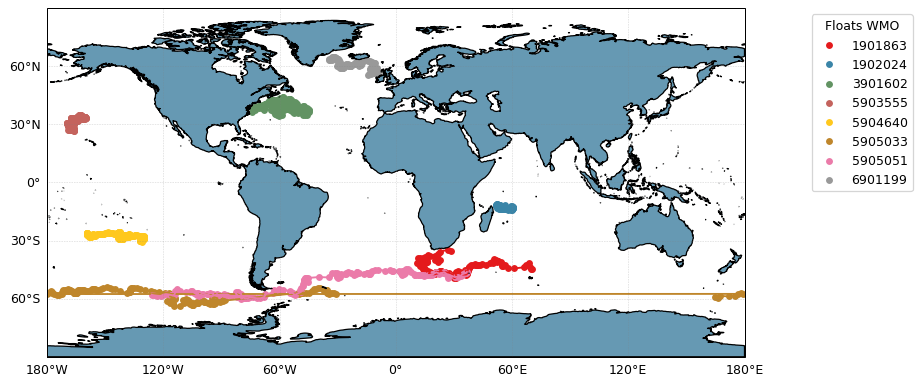

In [226]:
#plot the paths of each float on a global map

idx = ArgoDataFetcher().float(float_sel).load()
idx.plot('trajectory', set_global=True)

In [ ]:
#Pressure levels defined using the interpolation method
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

fig,ax = plt.subplots(figsize=(50,40))

for n in range(0,8):
    afloat = argo_loader.float(float_sel[n]).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    
    #levels = list(range(0, int(np.max(afloat.PRES))))
    levels = list(range(0, 1750))
    afloat_interp = afloat_prof.argo.interp_std_levels(levels)

    plt.subplot(3,3,int(n+1))
    afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL')
    plt.gca().invert_yaxis()
    #plt.title("Float number: {}".format(int(this_float.PLATFORM_NUMBER[0]))

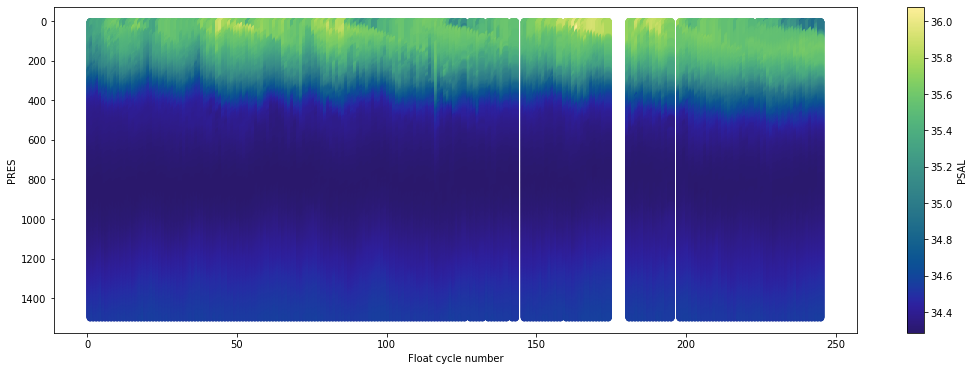

In [233]:
#Created using the interpolation method to define pressure levels
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

levels = list(range(0, 1500))

#this defines afloat_prof for the bin method in the cell below as well
afloat = argo_loader.float(float_sel[5]).to_xarray()
afloat_prof = afloat.argo.point2profile()
afloat_interp = afloat_prof.argo.interp_std_levels(levels)

fig,ax = plt.subplots(figsize=(18,6))
afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', ax=ax, cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

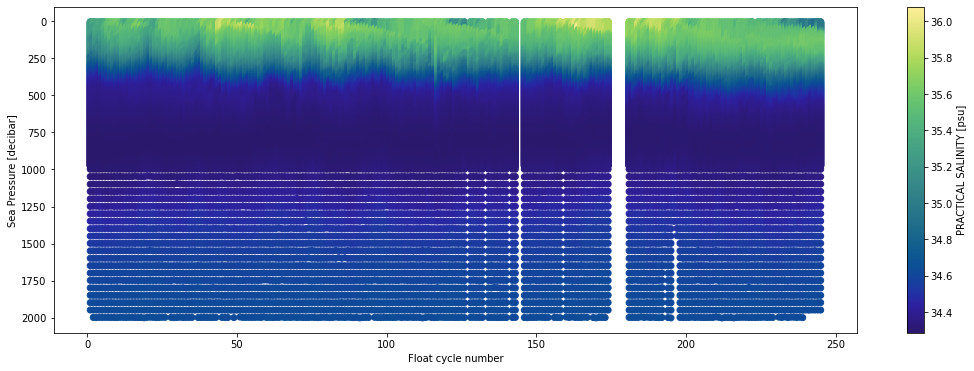

In [234]:
#Created using the bin method to define pressure levels
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

bins = np.arange(0.0, np.max(afloat_prof['PRES']))
afloat_binned = afloat_prof.argo.groupby_pressure_bins(bins=bins, select='random')

fig, ax = plt.subplots(figsize=(18,6))
afloat.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', ax=ax, cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

In [219]:
data = afloat_prof.PRES
maxim = np.max(data)
int(maxim)

2001